In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from os import path
from scipy.stats import spearmanr, pearsonr, kendalltau
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn import preprocessing, linear_model
from scipy.stats import zscore
from scipy.stats import poisson
from statsmodels.formula.api import logit
from sklearn.tree import DecisionTreeClassifier 

PATH_ORIGINAL_DST = 'dataset/original'
PATH_DST = 'dataset'

In [2]:
df = pd.read_csv(path.join(PATH_DST, 'dataset_v3_ENCODED.csv')).drop(columns=['Unnamed: 0'])

df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,outcome,continent
0,1872-11-30,159.0,61.0,0.0,0.0,56.0,588.0,158.0,0.0,0.0,3.0
1,1873-03-08,61.0,159.0,4.0,2.0,56.0,919.0,60.0,0.0,1.0,3.0
2,1874-03-07,159.0,61.0,2.0,1.0,56.0,588.0,158.0,0.0,1.0,3.0
3,1875-03-06,61.0,159.0,2.0,2.0,56.0,919.0,60.0,0.0,0.0,3.0
4,1876-03-04,159.0,61.0,3.0,0.0,56.0,588.0,158.0,0.0,1.0,3.0


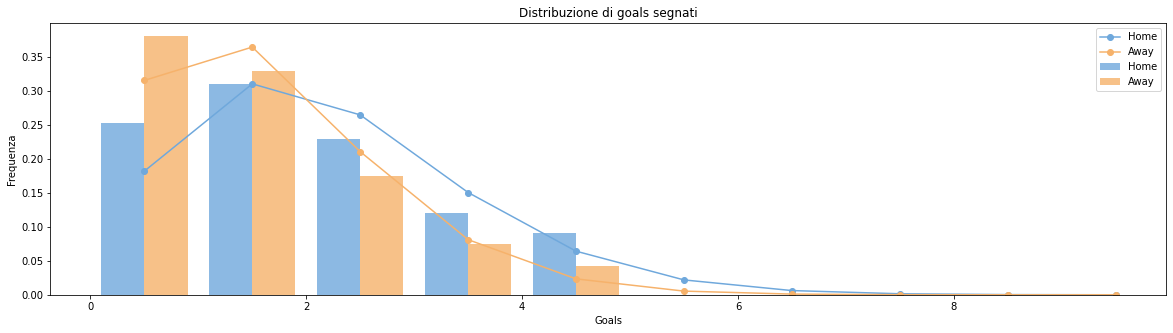

In [15]:
# confronto l'istogramma con la distribuzione di poisson per vedere se sono simili
plt.figure(figsize=(20,5))

plt.hist(df[['home_score', 'away_score']].values, range(6), alpha=0.8, label=['Home', 'Away'], density=True, color=["#6fa8dc", "#f6b26b"])

# sns.histplot(df[df['home_score'] > 0]['home_score'], kde=False, bins=30, label="Home score", color="y")
# sns.histplot(df[df['away_score'] > 0]['away_score'], kde=False, bins=30, label="Away score", color="b")
# plt.xticks([i for i in range(1,15)])

means = df[['home_score','away_score']].mean()
# construct Poisson  for each mean goals value
poisson_pred = np.column_stack([[poisson.pmf(k, means[j]) for k in range(10)] for j in range(2)])

plt.plot([i-0.5 for i in range(1,11)], poisson_pred[:,0],linestyle='-', marker='o',label="Home", color = '#6fa8dc')
plt.plot([i-0.5 for i in range(1,11)], poisson_pred[:,1],linestyle='-', marker='o',label="Away", color = '#f6b26b')

plt.legend()
plt.title("Distribuzione di goals segnati")
plt.xlabel("Goals")
plt.ylabel("Frequenza")
plt.show()

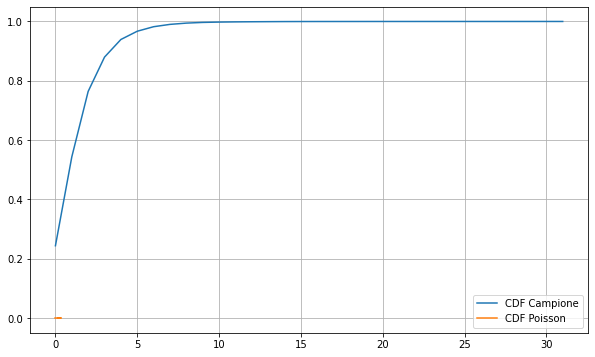

In [48]:
# confronto con cdf
plt.figure(figsize=(10,6))

# weight home_score
cdf_hs = df['home_score'].value_counts(normalize=True).sort_index().cumsum()
cdf_hs.plot()

# poisson cdf predicted
poisson_pred = [poisson.pmf(k, means[0]) for k in cdf_hs.index.values]
#TODO

plt.plot()
plt.grid()
plt.legend(['CDF Campione','CDF Poisson'])
plt.show()

In [ ]:
# q plot

In [ ]:
# applica modello

In [ ]:
# --- DEPR ----
# pairplot example
sns.pairplot(df)
plt.show()